In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# target is if there's a match or not 



In [2]:
dating = pd.read_csv('/Users/andreewerner/Desktop/speed_dating_data.csv',encoding="ISO-8859-1")


In [3]:
dating.shape


(8378, 195)

In [4]:
dating.dtypes
dating.dtypes.value_counts()
dating.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
wave           0
round          0
position       0
positin1    1846
order          0
partner        0
pid           10
match          0
int_corr     158
samerace       0
age_o        104
race_o        73
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
dec_o          0
attr_o       212
sinc_o       287
intel_o      306
fun_o        360
amb_o        722
shar_o      1076
            ... 
amb1_3      4404
shar1_3     4404
attr7_3     6362
sinc7_3     6362
intel7_3    6362
fun7_3      6362
amb7_3      6362
shar7_3     6362
attr4_3     5419
sinc4_3     5419
intel4_3    5419
fun4_3      5419
amb4_3      5419
shar4_3     5419
attr2_3     5419
sinc2_3     5419
intel2_3    5419
fun2_3      5419
amb2_3      5419
shar2_3     6362
attr3_3     4404
sinc3_3     4404
intel3_3    4404
fun3_3      4404
amb3_3      4404
attr5_3     6362
sinc5_3     6362
intel5_3    63

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Age')

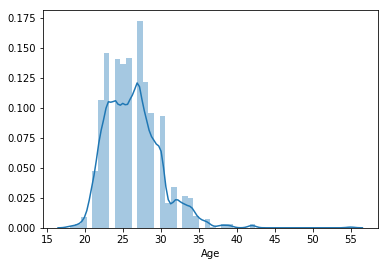

In [5]:
# looking at age distribution 
age_distr = dating[np.isfinite(dating['age'])]['age']
sns.distplot(age_distr.values)
plt.xlabel('Age')


In [7]:
# 277 men and 274 women
# dating.groupby('iid').mean().gender.value_counts()

0    0.835283
1    0.164717
Name: match, dtype: float64


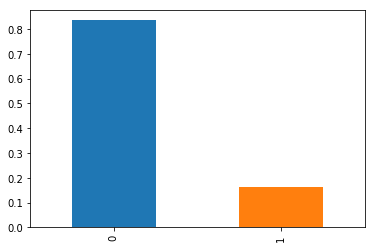

In [8]:
# pd.crosstab(index=dating['match'],columns="count")
target_pcts = dating['match'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [9]:

pd.options.display.max_columns = 195
pd.crosstab(index=dating['match'],columns="count")


col_0,count
match,
0,6998
1,1380


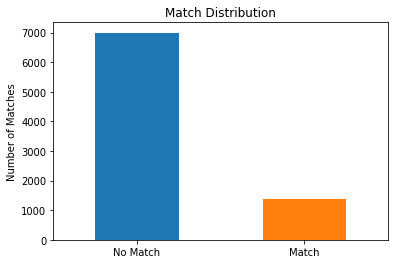

In [10]:
plt.figure()
dating['match'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('No Match','Match'),rotation='horizontal')
plt.ylabel('Number of Matches')
plt.title('Match Distribution')
plt.show()


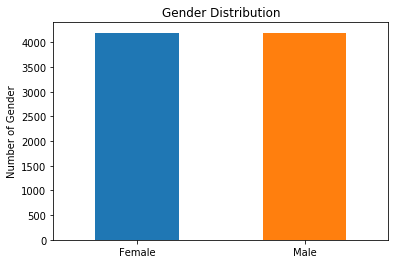

In [11]:
plt.figure()
dating['gender'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('Female','Male'),rotation='horizontal')
plt.ylabel('Number of Gender')
plt.title('Gender Distribution')
plt.show()

In [12]:
dating.corr().match.sort_values(ascending=False).head(10)


match     1.000000
dec_o     0.522326
dec       0.521943
like_o    0.305853
like      0.305723
fun_o     0.277700
fun       0.277545
shar_o    0.270840
shar      0.270679
attr_o    0.260837
Name: match, dtype: float64

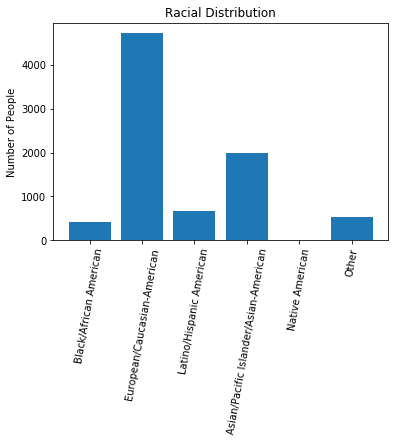

In [13]:
plt.figure()
plt.bar(np.arange(1,7), [ 420, 4727, 664, 1982,0, 522])
plt.xticks(np.arange(1,7),('Black/African American',
'European/Caucasian-American',
'Latino/Hispanic American',
'Asian/Pacific Islander/Asian-American',
'Native American',
'Other'),rotation=80)

plt.ylabel('Number of People')
plt.title('Racial Distribution')
plt.show()


In [14]:
dating['from'].value_counts().head(10)


New York         522
New Jersey       365
California       301
China            139
Italy            132
New York City    130
Boston           123
Texas            120
NYC              109
India            107
Name: from, dtype: int64

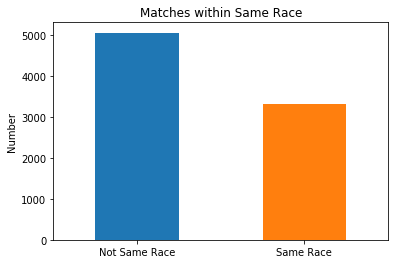

In [15]:
plt.figure()
dating['samerace'].value_counts().plot(kind='bar')
plt.xticks(np.arange(2),('Not Same Race','Same Race'),rotation='horizontal')
plt.ylabel('Number')
plt.title('Matches within Same Race')
plt.show()


In [16]:
dating.go_out.value_counts()


2.0    2990
1.0    2610
3.0    1949
4.0     450
5.0     164
6.0      99
7.0      37
Name: go_out, dtype: int64

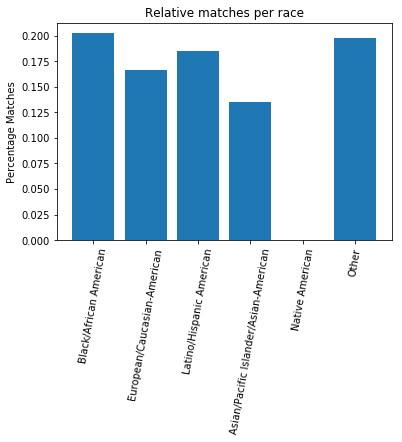

In [17]:
race_list = [1,2,3,4,6]
result = {}

for race in race_list:
    result[race] = len(dating[(dating['match'] ==1) & (dating['race'] == race)]) / len(dating[dating['race'] == race])

plt.figure()
plt.bar(list(result.keys()),list(result.values()))
plt.xticks(np.arange(1,7),('Black/African American',
'European/Caucasian-American',
'Latino/Hispanic American',
'Asian/Pacific Islander/Asian-American',
'Native American',
'Other'),rotation=80)
plt.title('Relative matches per race')
plt.ylabel('Percentage Matches')
plt.show()

In [19]:
gender_list = [0,1]
result = {}

for race in gender_list:
    result[race] = len(dating[(dating['match'] ==1) & (dating['gender'] == race)]) / len(dating[dating['gender'] == race])

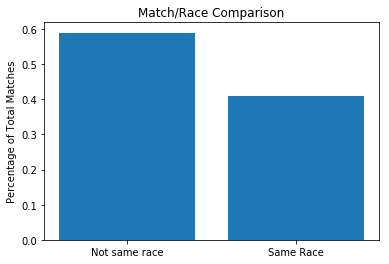

In [20]:
samerace_list = [0,1]
samerace_dict = {}
for samerace in samerace_list:
    
    samerace_dict[samerace] = len(dating[(dating['match'] ==1) & (dating['samerace'] == samerace)] ) / len(dating[dating['match'] == 1])
    
plt.figure()
plt.bar(list(samerace_dict.keys()),list(samerace_dict.values()))
plt.xticks(np.arange(2),('Not same race', 'Same Race'))
plt.title('Match/Race Comparison')
plt.ylabel('Percentage of Total Matches')
plt.show()

Text(0,0.5,'Frequency')

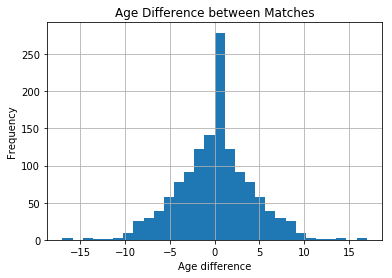

In [21]:
matches = dating[dating['match'] ==1]
age_diff = matches.age - matches.age_o
plt.figure()
age_diff.hist(bins=30)
plt.title('Age Difference between Matches')
plt.xlabel('Age difference')
plt.ylabel('Frequency')

In [22]:
len(dating[(dating['match'] ==1) & (dating['satis_2'] >= 1)]) / len(dating['match'] ==1)


0.14896156600620672

In [23]:
dating['satis_2'].value_counts()


6.0     1886
7.0     1383
5.0     1272
8.0      894
4.0      722
3.0      520
2.0      412
9.0      239
1.0       73
10.0      62
Name: satis_2, dtype: int64

In [24]:
career_list = np.arange(1,18)
career_dict = {}
for career in career_list:
    career_dict[career] = len(dating[(dating['match'] ==1) & (dating['career_c'] == career)]) / len(dating['career_c'] == career)

In [25]:
career_dict


{1: 0.01599427070899976,
 2: 0.0429696825017904,
 3: 0.00644545237526856,
 4: 0.0083552160420148,
 5: 0.004296968250179041,
 6: 0.013726426354738601,
 7: 0.046550489376939605,
 8: 0.0005968011458582001,
 9: 0.00942945810455956,
 10: 0.005729291000238721,
 11: 0.0041776080210074,
 12: 0.00011936022917164001,
 13: 0.0007161613750298401,
 14: 0.00035808068751492004,
 15: 0.0015516829792313201,
 16: 0.0009548818333731201,
 17: 0.00011936022917164001}

In [30]:
# Waves 6-9 rated importance fdrom 1-10 and others gave 100 points so deleting waves 6-9
points = (dating['wave'] != 6 ) &\
    (dating['wave'] != 7 ) &\
    (dating['wave'] != 8 ) &\
    (dating['wave'] != 9 )
   

   

dating.shape
# dating.head()

(8378, 195)

In [31]:
# # define some new metrics 
desirability = dating.groupby('iid').mean()['dec_o']
dating['desirability'] = dating['iid'].map(desirability)


# dec_o as 
choosy = dating.groupby('iid').mean()['dec']
dating['choosy'] = dating['iid'].map(choosy)

dating.shape

(8378, 197)

In [32]:
# # # remove responses/features that are too similar to target (i.e. questions like "how attracted are you to this person?")

match_correlations = dating.select_dtypes(include=[np.number])\
.corrwith(dating['match'])\
.sort_values(ascending=False)

match_correlations = match_correlations[match_correlations > .25].index

dating = dating.dropna(subset=['id', 'pid'], axis=0)

for i in match_correlations[1:]:
    del dating[i]

# Other columns that are too predictive
del dating['int_corr']
del dating['them_cal']
del dating['you_call']

del dating['field'] # redundant because field_coded gives field of study already 


match_correlations






Index(['match', 'dec_o', 'dec', 'like_o', 'like', 'fun_o', 'fun', 'shar_o',
       'shar', 'attr_o', 'attr', 'prob_o', 'prob'],
      dtype='object')

In [33]:
# change columns that are strings but should be numeric 
def change_to_number(col, df=dating, median=False):
    try:
        df[col] = df[col].str.replace(',', '')
    except:
        print('Column is not a string!')
    
    df[col] = df[col].astype(float)
    
    if median:
        df[col] = df[col].fillna(dating.fillna.median())
    
    else:
        df[col] = df[col].fillna(-100)
    
    return df

for i in 'zipcode mn_sat tuition income'.split():
    dating = change_to_number(i)

In [34]:
# change strings to lowercase 

for i in dating.columns:
    if dating[i].dtype == "O":
        dating[i] = dating[i].str.lower()
        print(i, end=', ')

undergra, from, career, 

In [35]:
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,dating_6,dating_7,dating_8], axis=1)
   

In [36]:
date.shape

(8367, 67)

In [37]:
date2=date.dropna()
date2.dtypes
date3=date2.drop(['field_cd','from','career'],axis=1)
date3.shape

(0, 64)

In [39]:
date4 = date3.drop(['sports', 'tvsports', 'excersice', 'dining', 'museums', 'art', 'hiking', 
                    'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 
                   'shopping', 'yoga'], axis=1)
date4.shape

KeyError: "['tvsports' 'excersice'] not found in axis"

In [18]:
# plt.subplots(figsize=(20,15))
# ax = plt.axes()
# ax.set_title("Correlation Heatmap")
# corr = date3.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)

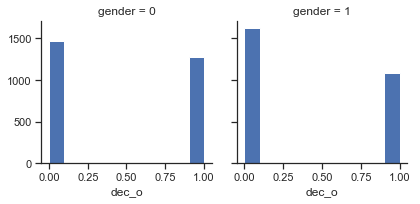

In [19]:
# men more likely to be rejected by women than women are by men 
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(date4, col="gender")
g = g.map(plt.hist, "dec_o")
plt.ticklabel_format(useOffset=False, style='plain')


In [20]:
# 26% of participants hoped to match while they're feelings weren't reciprocated
no_love = len(date4[(date4['dec_o']==0) & (date4['dec']==1)]) 
+ len(date4[(date4['dec_o']==1) & (date4['dec']==0)])
percent_broken_heart = no_love / len(date4.index)
percent_broken_heart*100

# make this a new columns
date4['unrequited']=np.where(((date4['dec_o']==0) & (date4['dec']==1))|((date4['dec']==0) & (date4['dec_o']==1)),1,0)
date4['unrequited']

30      0
31      0
33      0
34      1
35      1
36      1
37      0
38      0
39      1
40      0
41      0
42      1
43      0
44      0
45      1
46      1
47      1
48      0
49      1
50      1
51      1
52      1
53      0
54      1
55      1
56      1
57      0
58      0
59      1
60      0
       ..
8339    1
8340    1
8341    0
8342    0
8343    1
8345    0
8346    0
8347    1
8348    1
8349    1
8350    1
8351    1
8352    0
8354    1
8355    0
8357    0
8358    1
8361    1
8363    0
8364    1
8365    1
8367    0
8368    1
8369    1
8370    1
8371    0
8372    0
8374    0
8376    1
8377    1
Name: unrequited, Length: 5467, dtype: int64

Text(0.5,0,'Broken Hearted')

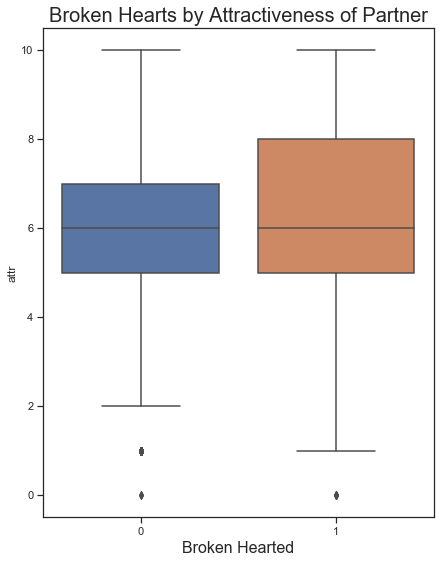

In [21]:
# looking at unrequited by attractiveness but doesn't seem significance, so likelihood of getting rejected isn't dependent on how attractive someone is 
plt.figure(figsize=(7,9))
sns.boxplot(x='unrequited', y='attr', data=date4)
plt.title('Broken Hearts by Attractiveness of Partner', fontsize=20)
plt.xlabel('Broken Hearted', fontsize=16)

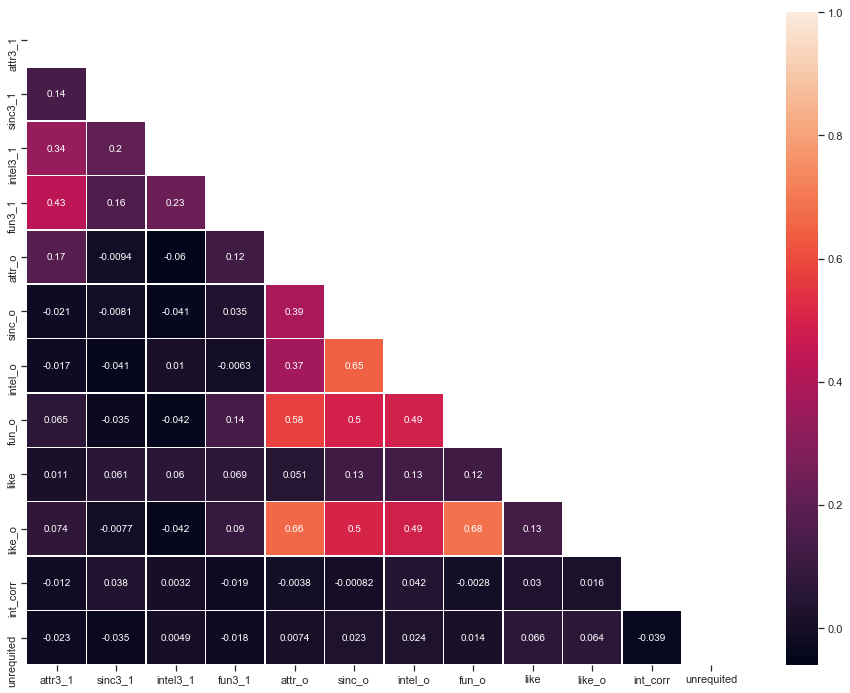

In [22]:
date5 = pd.concat([date4['attr3_1'],date4['sinc3_1'],date4['intel3_1'],date4['fun3_1'],date4['attr_o'],
                   date4['sinc_o'],date4['intel_o'],date4['fun_o'],date4['like'],date4['like_o'], 
                   date4['int_corr'],date4['unrequited']],axis=1)
# plt.subplots(figsize=(15,10))
# ax = plt.axes()
# ax.set_title("Correlation Heatmap")
# corr = date5.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values)
fig = plt.gcf()
fig.set_size_inches(16 , 12)
date5_corr=date5.corr()

mask = np.zeros_like(date5_corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(date5_corr, linewidth = 0.5, mask=mask, annot=True, annot_kws={'size': 10})






- your own opinion of how attractive you are (attr3_1) is only weakly correlated with how attractive your date finds you (attr_o)! And in fact, there is nearly no correlation between how smart or sincere you think you are versus how smart and sincere your date thinks of you! Perhaps these are tough qualities to get across in a 4 minute date!

- So that brings up the question, between attractiveness, sincerity, intelligence, fun, ambition, and liking, what was the most influential in the final decision (dec)? I'll run a linear regression model.

In [23]:
# OLS model with coefficients 
# decision of you and your partner have highest coeefficients - doesn't tell us much 
import statsmodels.api as sm

X_OLS = date4[['dec','dec_o','attr','attr_o','fun','fun_o','like','like_o','int_corr']]
y_OLS = date4.match
model = sm.OLS(y_OLS, X_OLS)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  match   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1116.
Date:                Thu, 25 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:12:17   Log-Likelihood:                -155.23
No. Observations:                5467   AIC:                             328.5
Df Residuals:                    5458   BIC:                             387.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dec            0.4434      0.008     55.238      0.000       0.428       0.459
dec_o          0.4434      0.008     55.550      0.000       0.428       0.459
attr          -0.0008      0.002     -0.328      0.743      -0.005       0.004
attr_o        -0.0003      0.002     -0.131      0.896      -0.005       0.004
fun            0.0004      0.002      0.171      0.864      -0.004       0.005
fun_o          0.0012      0.002      0.507      0.612      -0.004       0.006
like          -0.0162      0.003     -5.490      0.000      -0.022      -0.010
like_o        -0.0172      0.003     -5.920      0.000      -0.023      -0.012
int_corr       0.0147      0.011      1.330      0.184      -0.007       0.036
==============================================================================
Omnibus:                       50.739   Durbin-Watson:                   1.852
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              645.464
Skew:                           0.239   Prob(JB):                    6.91e-141
Kurtosis:                       1.386   Cond. No.                         51.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X=date4[['like','dec']]

y=date4['match']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

# logistic regression classification model
model = LogisticRegression(C=1, random_state=44)
logistic = model.fit(X_train, y_train)
predict_train_logistic = logistic.predict(X_train)
predict_test_logistic = logistic.predict(X_test)
print('Training Accuracy:', accuracy_score(y_train, predict_train_logistic))
print('Validation Accuracy:', accuracy_score(y_test, predict_test_logistic))

Training Accuracy: 0.8259775897553168
Validation Accuracy: 0.823583180987203


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- not accounting for partners decision, but only how much you like the partner and your decision to see them again, can predict with 83% accuracy if there will be a match or not. works with 26% of people being left broken hearted. If you like someone, they most likely will like you back 

In [25]:
from sklearn.metrics import confusion_matrix
y_pred = logistic.predict(X_test)
confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,896,8,904
1,185,5,190
All,1081,13,1094


In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rf = model.fit(X_train, y_train)
predict_train_rf = rf.predict(X_train)
predict_test_rf = rf.predict(X_test)
print('Training Accuracy:', accuracy_score(y_train, predict_train_rf))
print('Validation Accuracy:',accuracy_score(y_test, predict_test_rf))

Training Accuracy: 0.8280356734507204
Validation Accuracy: 0.8107861060329068


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: Ru

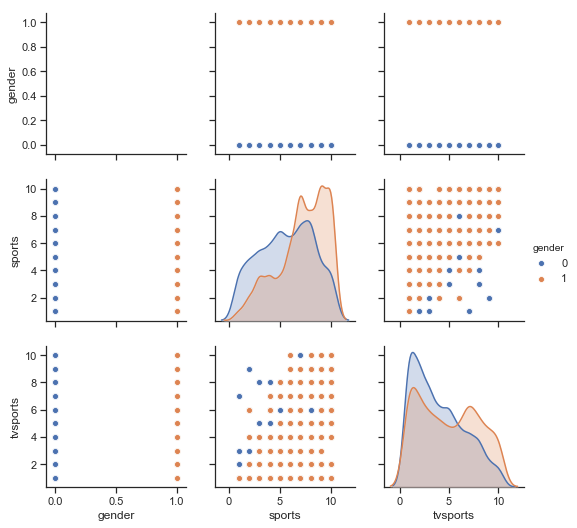

In [28]:
sns.set(style="ticks", color_codes=True)
date_int = pd.concat([date3.iloc[:, 1],date3.iloc[:, 30:32]],axis = 1)
g = sns.pairplot(date_int, hue="gender")

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dating.iloc[:, 1:], dating.iloc[:, 0], 
                                                    test_size = 0.2, random_state=42)

In [30]:
train_df = X_train.copy()
train_df['male'] = y_train

train_df['gender'] = train_df['male'].apply(lambda x: (x and 'male') or 'female')
train_df.head()


,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,male
4140,7.0,male,14,2,11,21,13,13.0,8,4,255.0,0,-0.25,0,26.0,4.0,16.67,16.67,16.67,16.67,16.67,16.67,0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,2.0,25.0,biology,10.0,unlv,-100.0,9696.0,2.0,7.0,1.0,"las vegas, nevada",89014.0,43844.0,3.0,4.0,2.0,scientist,2.0,7.0,1.0,6.0,5.0,2.0,3.0,5.0,3.0,4.0,9.0,6.0,3.0,8.0,1.0,2.0,1.0,1.0,7.0,NaN,27.0,15.0,28.0,10.0,10.0,10.0,40.0,3.0,25.0,8.0,13.0,11.0,40.0,3.0,25.0,8.0,13.0,11.0,8.0,9.0,6.0,10.0,7.0,7.0,6.0,8.0,7.0,8.0,0,5.0,5.0,7.0,3.0,6.0,4.0,2.0,6.0,0.0,4.0,25.0,20.0,30.0,15.0,5.0,5.0,8.0,7.0,10.0,3.0,5.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,19.0,30.0,15.0,6.0,10.0,35.0,20.0,15.0,15.0,5.0,10.0,25.00,20.00,15.00,10.00,20.00,10.00,8.0,7.0,9.0,5.0,5.0,7.0,6.0,9.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279
5711,17.0,male,34,2,14,20,16,16.0,8,8,348.0,0,-0.07,1,21.0,4.0,15.00,25.00,15.00,15.00,15.00,15.00,1,8.0,8.0,8.0,8.0,8.0,7.0,7.0,5.0,2.0,26.0,business school,8.0,nyu,1340.0,25380.0,4.0,3.0,2.0,new york,7039.0,-100.0,1.0,5.0,1.0,investment management,7.0,7.0,9.0,6.0,6.0,3.0,3.0,1.0,7.0,8.0,6.0,8.0,5.0,8.0,7.0,8.0,6.0,2.0,6.0,NaN,25.0,20.0,10.0,20.0,15.0,10.0,45.0,10.0,5.0,30.0,5.0,5.0,20.0,25.0,20.0,20.0,10.0,5.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,7.0,8.0,7.0,0,5.0,9.0,8.0,9.0,8.0,6.0,5.0,6.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,20.0,20.0,30.0,20.0,10.0,20.0,20.0,20.0,20.0,20.0,20.0,16.67,16.67,16.67,16.67,16.67,16.67,7.0,9.0,8.0,7.0,8.0,7.0,8.0,8.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377
6856,3.0,male,6,1,18,6,6,5.0,2,5,458.0,1,-0.44,1,29.0,4.0,50.00,5.00,25.00,20.00,0.00,0.00,1,4.0,9.0,6.0,7.0,8.0,7.0,6.0,8.0,2.0,33.0,electrical engineering,5.0,china,-100.0,-100.0,4.0,1.0,5.0,"cambridge, ma",-100.0,-100.0,4.0,6.0,6.0,"professor, or engineer",2.0,8.0,7.0,5.0,2.0,6.0,6.0,1.0,2.0,7.0,3.0,8.0,5.0,7.0,6.0,9.0,2.0,2.0,8.0,NaN,30.0,30.0,10.0,10.0,0.0,20.0,10.0,30.0,20.0,10.0,10.0,20.0,20.0,20.0,10.0,20.0,10.0,20.0,4.0,9.0,6.0,8.0,2.0,3.0,10.0,7.0,8.0,3.0,1,8.0,7.0,7.0,7.0,6.0,5.0,7.0,4.0,0.0,3.0,7.0,8.0,4.0,5.0,3.0,4.0,5.0,8.0,7.0,8.0,4.0,2.0,1.0,1.0,30.0,30.0,10.0,10.0,0.0,20.0,30.0,20.0,15.0,15.0,0.0,20.0,30.0,20.0,10.0,20.0,10.0,10.0,30.00,30.00,10.00,10.00,10.00,10.00,4.0,8.0,7.0,6.0,2.0,3.0,9.0,8.0,7.0,2.0,0.0,0.0,0.0,NaN,NaN,30.0,30.0,10.0,20.0,0.0,10.0,30.0,20.0,10.0,20.0,0.0,20

In [31]:
# sns.pairplot(train_df, hue='male')


In [32]:
# sns.set(style="ticks", color_codes=True)
# dating_int = pd.concat([dating.iloc[:, 1],dating.iloc[:, 30:32]],axis = 1)
# g = sns.pairplot(dating_int, hue='gender')

In [33]:
# from sklearn.dummy import DummyClassifier

# data_benchmark = pd.get_dummies(data)
# data_benchmark.fillna(data_benchmark.median(), inplace=True)

# xbench = data_benchmark.drop('match', axis=1)
# ybench = data_benchmark['match']

# dum = DummyClassifier(strategy='constant', constant=1)

# cvs = cross_val_score(dum, xbench, ybench, scoring=scorer, cv=5)

# benchmark_score = cvs.mean()

# print('Naive Benchmark:', benchmark_score)

## feature engineering

In [34]:
dating['from_new_england'] = 0
for i in 'massachu connect rhode vermont vt hampsh maine boston cambridge'.split():
    dating['from_new_england'] = np.where((dating['from'].str.contains(i)) |\
                                   (dating['undergra'].str.contains(i)), 1,
                                        dating['from_new_england'])

dating['from_china'] = 0
for i in 'china beijing shanghai hong taiwan'.split():
    dating['from_china'] = np.where((dating['from'].str.contains(i)) |\
                                  (dating['undergra'].str.contains(i)), 1,
                                  dating['from_china'])

dating['from_india'] = 0
for i in 'india delhi bangalore'.split():
    dating['from_india'] = np.where((dating['from'].str.contains(i)) |\
                                  (dating['undergra'].str.contains(i)), 1,
                                  dating['from_india'])

dating['from_europe'] = 0
for i in 'europe germany italy france spain poland portugal netherlands holland sweden switz greece belgium paris rome'.split():
    dating['from_europe'] = np.where((dating['from'].str.contains(i)) |\
                                   (dating['undergra'].str.contains(i)), 1,
                                   dating['from_europe'])

dating['from_uk'] = 0
for i in 'london england uk britain scotland ireland kingdom oxford'.split():
    dating['from_uk'] = np.where((dating['from'].str.contains(i)) |\
                                   (dating['undergra'].str.contains(i)), 1,
                               dating['from_uk'])


dating['from_ny'] = 0
for i in ['new york', 'ny']:
    dating['from_ny'] = np.where((dating['from'].str.contains(i)) |\
                               (dating['undergra'].str.contains(i)), 1,
                               dating['from_ny'])


dating['from_nj'] = 0
for i in ['new jersey', 'nj']:
    dating['from_nj'] = np.where((dating['from'].str.contains(i)) |\
                               (dating['undergra'].str.contains(i)), 1,
                               dating['from_nj'])


dating['from_california'] = 0
for i in 'cali diego francisco jose davis sacramento oakland clara angeles ucla stanford berkeley alto torrance'.split():
    dating['from_california'] = np.where((dating['from'].str.contains(i)) |\
                                   (dating['undergra'].str.contains(i)), 1,
                                       dating['from_california'])

dating['from_texas'] = 0
for i in 'texas tx dallas austin houston dfw antonio'.split():
    dating['from_texas'] = np.where((dating['from'].str.contains(i)) |\
                                   (dating['undergra'].str.contains(i)), 1,
                                  dating['from_texas'])
 


In [37]:
dating['education'] = 0
for i in 'professor teach academ educ'.split():
    dating['education'] = np.where(dating['career'].str.contains(i),
                                        1, dating['education'])

dating['law'] = 0
for i in 'law attorney legal defender counsel'.split():
    dating['law'] = np.where(dating['career'].str.contains(i),
                                  1, dating['law'])

dating['medicine'] = 0
for i in 'doctor dr physician md medical m.d. cardio dentist surg'.split():
    dating['medicine'] = np.where(dating['career'].str.contains(i),
                                       1, dating['medicine'])

dating['business'] = 0
for i in 'business mba m.b.a. consult manage ceo c.e.o. entre finance venture market strategy invest bank equity'.split():
    dating['business'] = np.where(dating['career'].str.contains(i),
                                       1, dating['business'])
    
dating['science'] = 0
for i in 'sci research biolo chemi'.split():
    dating['science'] = np.where(dating['career'].str.contains(i),
                                      1, dating['science'])

dating['politics'] = 0
for i in 'gov diplo poli'.split():
    dating['politics'] = np.where(dating['career'].str.contains(i),
                                  1, dating['politics'])


In [38]:
dating['Columbia'] = 0
for i in 'columbia'.split():
    dating['Columbia'] = np.where(dating['undergra'].str.contains(i),
                                       1, dating['Columbia'])

# Ivy league and other prestigious schools
dating['Schools'] = 0
for i in 'dartmouth cornell princeton penn yale brown harvard stanford mit berkeley oxford'.split():
    dating['Schools'] = np.where(dating['undergra'].str.contains(i),
                                  1, dating['Schools'])

In [40]:
# Dummify
dating = pd.get_dummies(dating, prefix='dummy')

#fix duplicate column names
cols = pd.Series(dating.columns)

for duplicate in dating.columns.get_duplicates():
    cols[dating.columns.get_loc(duplicate)] =\
    [duplicate+'.'+str(d_idx) if d_idx!=0 else duplicate for d_idx in range(dating.columns.get_loc(duplicate).sum())]

dating.columns = cols

dating.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'get_duplicates' is deprecated and will be removed in a future release. You can use idx[idx.duplicated()].unique() instead
  import sys


(6805, 914)

In [41]:
dating.isnull().sum().sort_values(ascending=False)[:10]

num_in_3    6217
numdat_3    5745
expnum      5015
amb7_2      4851
sinc7_2     4851
shar7_2     4832
intel7_2    4822
attr7_2     4822
fun7_2      4822
shar4_3     4790
dtype: int64